In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
#["japanese", "thai", "american"]

In [253]:
cuisines = pd.read_csv("FinalData/cuisines.csv").drop('Unnamed: 0', axis = 1)
cuisines_by_city = pd.read_csv("FinalData/cuisines_by_city.csv")
#city_weather_df = pd.read_csv("WeatherData/WeatherData.csv")


In [254]:
cuisines_by_city

,City,Business ID,Total Check-Ins,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,Name,State,Category,Rating,Review Count
0,Las Vegas,hihud--QRriCYZw1zZvW4g,8917,886,742,840,850,866,843,951,848,623,574,608,286,Gangnam Asian BBQ Dining,NV,japanese korean bbq,4.5,3761.0
1,Las Vegas,FNe5PPA9pyj8FjcDefCBpg,3947,273,239,308,314,495,422,413,404,359,297,269,154,Weera Thai Restaurant - Sahara,NV,thai bars,4.5,1364.0
2,Las Vegas,QXV3L_QFGj8r6nWX2kS2hA,9893,728,755,890,836,1113,905,979,990,838,691,861,307,Nacho Daddy,NV,newamerican mexican breakfast_brunch,4.5,4649.0
3,Charlotte,6hZgMg9rnDCC0RBVRlkZwQ,226,18,13,17,12,10,20,20,24,24,35,26,7,Mr Tokyo Japanese Restaurant,NC,japanese sushi salad,4.0,505.0
4,Charlotte,HhcBx0LSDkxRBKMkvkwSoA,225,17,26,27,21,35,23,21,19,12,4,16,4,Deejai Noodle Bar,NC,thai noodles cocktailbars,4.0,243.0
5,Charlotte,WbJ1LRQdOuYYlRLyTkuuxw,650,54,42,61,30,44,53,112,94,46,38,62,14,Tupelo Honey,NC,southern newamerican breakfast_brunch,4.0,2093.0
6,Toronto,ZyOuwa3Eau6dbUiEPwsUoA,1432,16,15,12,10,30,116,321,267,189,185,208,63,Katsuya,ON,japanese,4.0,139.0
7,Toronto,ATaDg2kdS9GTln1-tS6iIw,1408,126,98,160,129,152,157,146,154,117,80,75,14,EAT BKK Thai Kitchen & Bar,ON,thai,4.5,209.0


In [255]:
lv_cuisines = cuisines_by_city.loc[cuisines_by_city['City'] == 'Las Vegas']

# Created a new DataFrame for each city

In [256]:
#create a new data frame for las vegas checkin per category
LV_df = pd.DataFrame({'months': ["jan","feb","mar","april","may","june","july","aug","sep","oct","nov","dec"],
                      'Japanese_Check-Ins': [886,742,840,850,866,843,951,848,623,574,608,286],
                   'Thai_Check-Ins': [273,239,308,314,495,422,413,404,359,297,269,154],
                   'American_Check-Ins': [728,755,890,836,1113,905,979,990,838,691,861,307]})


In [257]:
#create a new data frame for Charlotte checkin per category
Charlotte_df = pd.DataFrame({'months': ["jan","feb","mar","april","may","june","july","aug","sep","oct","nov","dec"],
                      'Japanese_Check-Ins': [18,13,17,12,10,20,20,24,24,35,26,7],
                   'Thai_Check-Ins': [17,26,27,21,35,23,21,19,12,4,16,4],
                   'American_Check-Ins': [54,42,61,30,44,53,112,94,46,38,62,14]
                     })


In [258]:
#create a new data frame for Charlotte checkin per category
Toronto_df = pd.DataFrame({'months': ["jan","feb","mar","april","may","june","july","aug","sep","oct","nov","dec"],
                      'Japanese_Check-Ins': [16,15,12,10,30,116,321,267,189,185,208,63],
                   'Thai_Check-Ins': [126,98,160,129,152,157,146,154,117,80,75,14],
                     })


# plot bar graps to visualize all monthly category check-ins for each city

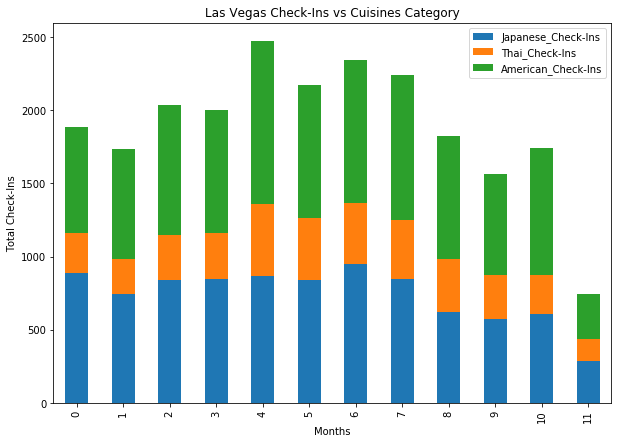

In [259]:
#plot a bar graph to visualize all the categories available with the number of check- ins

LV_df.loc[:,['Japanese_Check-Ins','Thai_Check-Ins', 'American_Check-Ins']].plot.bar(stacked=True, figsize=(10,7))
plt.xlabel('Months')
plt.ylabel('Total Check-Ins')
plt.title('Las Vegas Check-Ins vs Cuisines Category')
plt.show()

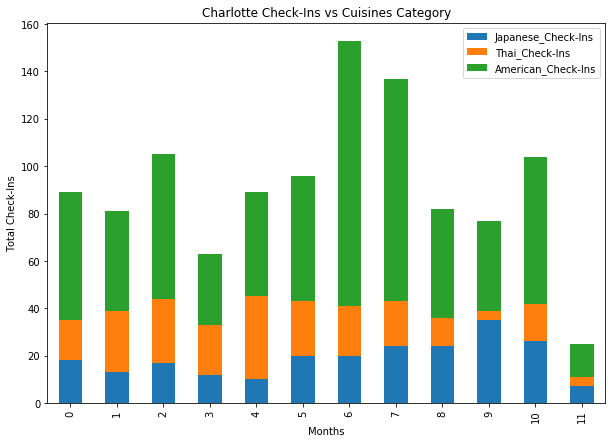

In [260]:
#plot a bar graph to visualize all the categories available with the number of check- ins

Charlotte_df.loc[:,['Japanese_Check-Ins','Thai_Check-Ins', 'American_Check-Ins']].plot.bar(stacked=True, figsize=(10,7))
plt.xlabel('Months')
plt.ylabel('Total Check-Ins')
plt.title('Charlotte Check-Ins vs Cuisines Category')
plt.show()

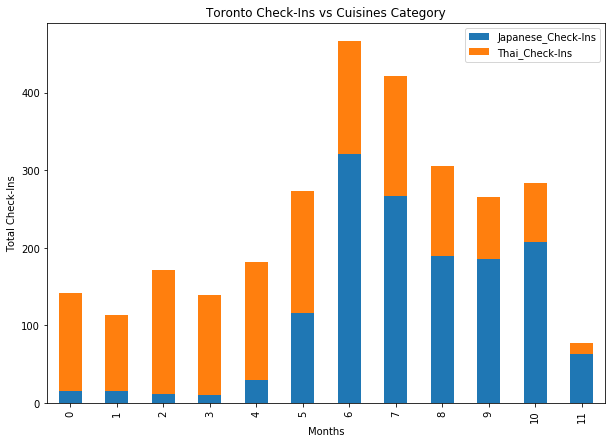

In [261]:
#plot a bar graph to visualize all the categories available with the number of check- ins

Toronto_df.loc[:,['Japanese_Check-Ins','Thai_Check-Ins']].plot.bar(stacked=True, figsize=(10,7))
plt.xlabel('Months')
plt.ylabel('Total Check-Ins')
plt.title('Toronto Check-Ins vs Cuisines Category')

plt.show()

# Make analysis in relation to the average weather temperature(f)

# Average Temperature VS Las Vegas cuisines check-in

In [262]:
#read weather data 
#merge city weather data with cuisines data by city

lv_weather = pd.read_csv("WeatherData/LVMonthly2019.csv").drop('Unnamed: 0', axis = 1)
lv_temps = lv_weather['Average Temperature (F)']
lv_temps = lv_temps.to_frame()

In [263]:
#merge city weather data with cuisines data by city
lv_merge_df = pd.concat([LV_df, lv_temps], axis = 1)
lv_merge_df

,months,Japanese_Check-Ins,Thai_Check-Ins,American_Check-Ins,Average Temperature (F)
0,jan,886,273,728,50.36
1,feb,742,239,755,47.66
2,mar,840,308,890,60.08
3,april,850,314,836,71.06
4,may,866,495,1113,71.24
5,june,843,422,905,87.80
6,july,951,413,979,94.10
7,aug,848,404,990,94.28
8,sep,623,359,838,83.66
9,oct,574,297,691,66.56


True


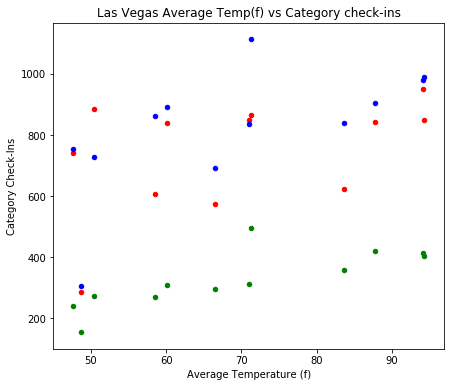

In [264]:
# #df = pd.DataFrame(np.random.randn(100, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])

fig, ax1 = plt.subplots(figsize=(7,6))
ax1 = lv_merge_df.plot(kind='scatter',x='Average Temperature (F)', y='Japanese_Check-Ins', color='r',ax=ax1)   
ax2 = lv_merge_df.plot(kind='scatter',x='Average Temperature (F)', y='Thai_Check-Ins', color='g',ax = ax1) 
ax3 = lv_merge_df.plot(kind='scatter', x='Average Temperature (F)', y='American_Check-Ins', color='b',ax = ax1) 
ax1.set_xlabel('Average Temperature (f)')
ax1.set_ylabel('Category Check-Ins')
ax1.set_title('Las Vegas Average Temp(f) vs Category check-ins')

# True
print(ax1 == ax2 == ax3)                      

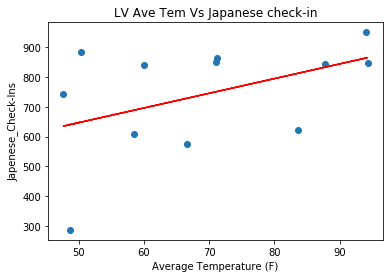

R-square is :0.2
p-value is :0.14


In [265]:
#ploting a scatter plot with linear regression
x_values = lv_merge_df['Average Temperature (F)']
y_values = lv_merge_df['Japanese_Check-Ins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rex_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.scatter(x_values,y_values)
plt.plot(x_values,rex_values,"r-")
#plt.annotate(line_eq,(10,10),fontsize=20,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Japenese_Check-Ins')
plt.title('LV Ave Tem Vs Japanese check-in')
plt.show()
print(f"R-square is :{round(rvalue**2,2)}")
print(f"p-value is :{round(pvalue, 2)}")


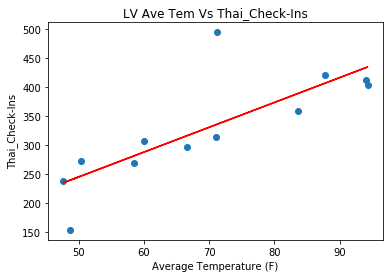

R-square is : 0.62
p-value is : 0.0


In [266]:
#ploting a scatter plot with linear regression
x_values = lv_merge_df['Average Temperature (F)']
y_values = lv_merge_df['Thai_Check-Ins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rex_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.scatter(x_values,y_values)
plt.plot(x_values,rex_values,"r-")
#plt.annotate(line_eq,(10,10),fontsize=20,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Thai_Check-Ins')
plt.title('LV Ave Tem Vs Thai_Check-Ins')
plt.show()
print(f"R-square is : {round(rvalue**2,2)}")
print(f"p-value is : {round(pvalue, 2)}")


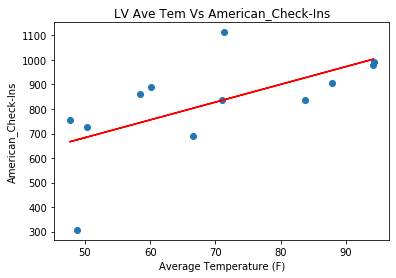

R-square is 0.38
p-value is 0.03


In [267]:
#ploting a scatter plot with linear regression
x_values = lv_merge_df['Average Temperature (F)']
y_values = lv_merge_df['American_Check-Ins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rex_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.scatter(x_values,y_values)
plt.plot(x_values,rex_values,"r-")
#plt.annotate(line_eq,(10,10),fontsize=20,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('American_Check-Ins')
plt.title('LV Ave Tem Vs American_Check-Ins')
plt.show()
print(f"R-square is {round(rvalue**2,2)}")
print(f"p-value is {round(pvalue, 2)}")


In [268]:
#Read weather data for Charlotte
Charlotte_weather = pd.read_csv("WeatherData/CHMonthly2019.csv").drop('Unnamed: 0', axis = 1)
Charlotte_temps = Charlotte_weather['Average Temperature (F)']
Charlotte_temps = Charlotte_temps.to_frame()

In [269]:
#merge city weather data with cuisines data by city
Charlotte_merge_df = pd.concat([Charlotte_df, Charlotte_temps], axis = 1)
Charlotte_merge_df

,months,Japanese_Check-Ins,Thai_Check-Ins,American_Check-Ins,Average Temperature (F)
0,jan,18,17,54,43.88
1,feb,13,26,42,50.18
2,mar,17,27,61,50.72
3,april,12,21,30,63.14
4,may,10,35,44,74.30
5,june,20,23,53,76.64
6,july,20,21,112,81.50
7,aug,24,19,94,79.34
8,sep,24,12,46,78.62
9,oct,35,4,38,67.10


# Average Temperature VS Charlotte cuisines check-in

True


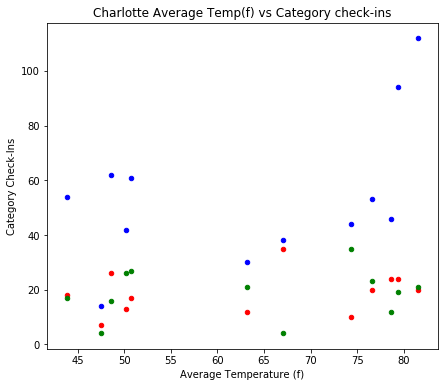

In [270]:
# #df = pd.DataFrame(np.random.randn(100, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])

fig, ax1 = plt.subplots(figsize=(7,6))
ax1 = Charlotte_merge_df.plot(kind='scatter',x='Average Temperature (F)', y='Japanese_Check-Ins', color='r',ax=ax1)   
ax2 = Charlotte_merge_df.plot(kind='scatter',x='Average Temperature (F)', y='Thai_Check-Ins', color='g',ax = ax1) 
ax3 = Charlotte_merge_df.plot(kind='scatter', x='Average Temperature (F)', y='American_Check-Ins', color='b',ax = ax1) 
ax1.set_xlabel('Average Temperature (f)')
ax1.set_ylabel('Category Check-Ins')
ax1.set_title('Charlotte Average Temp(f) vs Category check-ins')

# True
print(ax1 == ax2 == ax3)                      

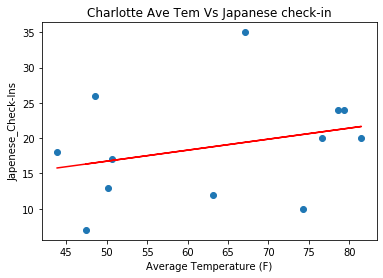

R-square is : 0.08
p-value is : 0.36


In [271]:
#ploting a scatter plot with linear regression
x_values = Charlotte_merge_df['Average Temperature (F)']
y_values =Charlotte_merge_df['Japanese_Check-Ins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rex_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.scatter(x_values,y_values)
plt.plot(x_values,rex_values,"r-")
#plt.annotate(line_eq,(10,10),fontsize=20,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Japenese_Check-Ins')
plt.title('Charlotte Ave Tem Vs Japanese check-in')
plt.show()
print(f"R-square is : {round(rvalue**2,2)}")
print(f"p-value is : {round(pvalue, 2)}")


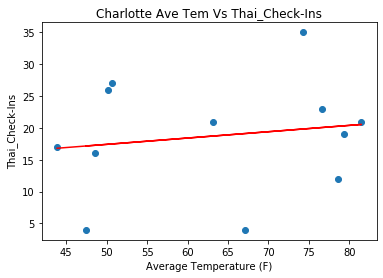

R-square is 0.03
p-value is 0.62


In [272]:
#ploting a scatter plot with linear regression
x_values = Charlotte_merge_df['Average Temperature (F)']
y_values = Charlotte_merge_df['Thai_Check-Ins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rex_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.scatter(x_values,y_values)
plt.plot(x_values,rex_values,"r-")
#plt.annotate(line_eq,(10,10),fontsize=20,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Thai_Check-Ins')
plt.title('Charlotte Ave Tem Vs Thai_Check-Ins')
plt.show()
print(f"R-square is {round(rvalue**2,2)}")
print(f"p-value is {round(pvalue, 2)}")


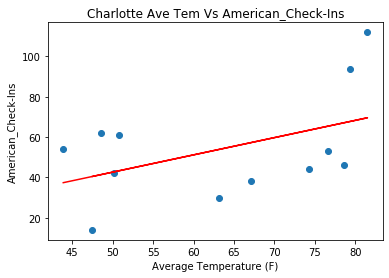

R-square is :0.22
p-value is :0.13


In [273]:
#ploting a scatter plot with linear regression
x_values = Charlotte_merge_df['Average Temperature (F)']
y_values = Charlotte_merge_df['American_Check-Ins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rex_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.scatter(x_values,y_values)
plt.plot(x_values,rex_values,"r-")
#plt.annotate(line_eq,(10,10),fontsize=20,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('American_Check-Ins')
plt.title('Charlotte Ave Tem Vs American_Check-Ins')
plt.show()
print(f"R-square is :{round(rvalue**2,2)}")
print(f"p-value is :{round(pvalue, 2)}")


# Toronto DataFrame

In [274]:
#read weather data for Toronto
Toronto_weather = pd.read_csv("WeatherData/TNMonthly2019.csv").drop('Unnamed: 0', axis = 1)
Toronto_temps = Toronto_weather['Average Temperature (F)']
Toronto_temps = Toronto_temps.to_frame()

In [275]:
#merge city weather data with cuisines data by city
Toronto_merge_df = pd.concat([Toronto_df, Toronto_temps], axis = 1)
Charlotte_merge_df

,months,Japanese_Check-Ins,Thai_Check-Ins,American_Check-Ins,Average Temperature (F)
0,jan,18,17,54,43.88
1,feb,13,26,42,50.18
2,mar,17,27,61,50.72
3,april,12,21,30,63.14
4,may,10,35,44,74.30
5,june,20,23,53,76.64
6,july,20,21,112,81.50
7,aug,24,19,94,79.34
8,sep,24,12,46,78.62
9,oct,35,4,38,67.10


# Average Temperature VS Toronto cuisines check-in

True


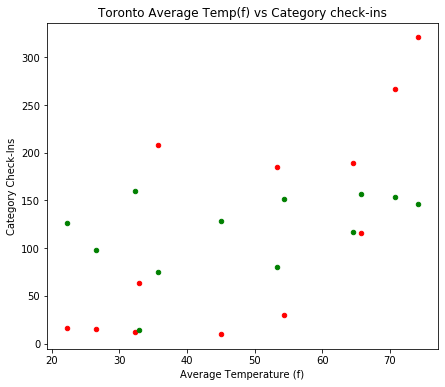

In [276]:
# #df = pd.DataFrame(np.random.randn(100, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])

fig, ax1 = plt.subplots(figsize=(7,6))
ax1 = Toronto_merge_df.plot(kind='scatter',x='Average Temperature (F)', y='Japanese_Check-Ins', color='r',ax=ax1)   
ax2 = Toronto_merge_df.plot(kind='scatter',x='Average Temperature (F)', y='Thai_Check-Ins', color='g',ax = ax1) 
#ax3 = Charlotte_merge_df.plot(kind='scatter', x='Average Temperature (F)', y='American_Check-Ins', color='b',ax = ax1) 
ax1.set_xlabel('Average Temperature (f)')
ax1.set_ylabel('Category Check-Ins')
ax1.set_title('Toronto Average Temp(f) vs Category check-ins')

# True
print(ax1 == ax2)                      

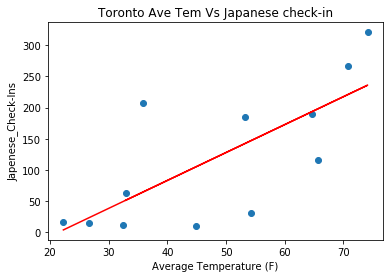

R-square is : 0.53
p-value is : 0.01


In [277]:
#ploting a scatter plot with linear regression
x_values = Toronto_merge_df['Average Temperature (F)']
y_values =Toronto_merge_df['Japanese_Check-Ins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rex_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.scatter(x_values,y_values)
plt.plot(x_values,rex_values,"r-")
#plt.annotate(line_eq,(10,10),fontsize=20,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Japenese_Check-Ins')
plt.title('Toronto Ave Tem Vs Japanese check-in')
plt.show()
print(f"R-square is : {round(rvalue**2,2)}")
print(f"p-value is : {round(pvalue, 2)}")


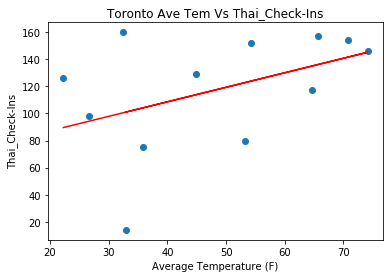

R-square is :0.2
p-value is :0.15


In [278]:
#ploting a scatter plot with linear regression
x_values = Toronto_merge_df['Average Temperature (F)']
y_values = Toronto_merge_df['Thai_Check-Ins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
rex_values = x_values * slope + intercept
line_eq = "y = " + str(slope) + "x + " + str(intercept)
plt.scatter(x_values,y_values)
plt.plot(x_values,rex_values,"r-")
#plt.annotate(line_eq,(10,10),fontsize=20,color="red")
plt.xlabel('Average Temperature (F)')
plt.ylabel('Thai_Check-Ins')
plt.title('Toronto Ave Tem Vs Thai_Check-Ins')
plt.show()
print(f"R-square is :{round(rvalue**2,2)}")
print(f"p-value is :{round(pvalue, 2)}")

# Measure of Central Tendency Statistical Analysis

In [311]:
#the mean check in for 3 restuarant check ins in each sity 

mean_checkin_LV = LV_df.iloc[0, 1:5].mean()
mean_checkin_CH = Charlotte_df.iloc[0, 1:5].mean()
mean_checkin_TN = Toronto_df.iloc[0,1:5].mean()

print(f' The average number of check-ins for Las Vegas Restauarants is {round(mean_checkin_LV, 2)}')
print(f' The average number of check-ins for Charlotte Restauarants is {round(mean_checkin_CH,2)}')
print(f' The average number of check-ins for Toronto Restauarants is {round(mean_checkin_TN,2)}')


 The average number of check-ins for Las Vegas Restauarants is 629.0
 The average number of check-ins for Charlotte Restauarants is 29.67
 The average number of check-ins for Toronto Restauarants is 71.0


In [ ]:
#make a Dataframe for the TOtal number of Checking 